In [41]:
import nilmtk
import matplotlib.pyplot as plt

# Building 1

In [2]:
redd = nilmtk.DataSet("redd.h5")

In [3]:
building_1 = redd.buildings[1].elec

In [4]:
building_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [5]:
building_1.available_ac_types('power')

['active', 'apparent']

In [6]:
building_1.submeters().available_ac_types('power')

['active']

In [7]:
building_1.submeters()

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=14, building=1, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(insta

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


<Axes: >

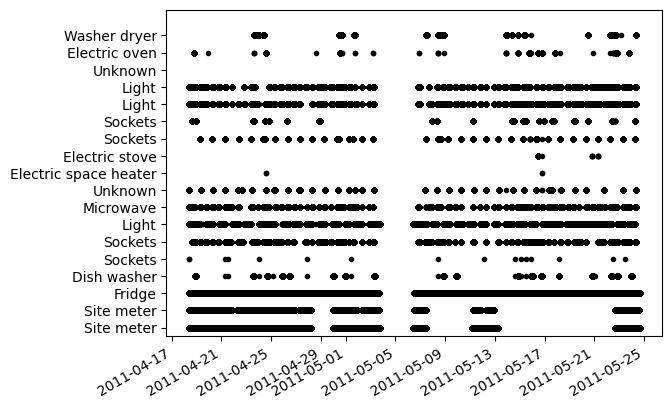

In [8]:
building_1.plot_when_on(on_power_threshold = 40)

## Hart 85

In [9]:
import pandas as pd

In [10]:
from nilmtk.timeframe import TimeFrame

In [11]:
# Hart85 functions
from nilmtk.disaggregate.hart_85 import Hart85

from nilmtk.feature_detectors.steady_states import find_steady_states
from nilmtk.feature_detectors.cluster import hart85_means_shift_cluster

### Main Meter

In [22]:
building_1.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [21]:
main_meter = building_1.mains()[1]

**Training time: 5 hours**

In [25]:
delta_time = pd.to_timedelta(5, unit='h')

In [26]:
start_time = main_meter.get_timeframe().start
end_time = start_time + delta_time

In [27]:
print("Start Time:", start_time)
print("End Time:",   end_time)

Start Time: 2011-04-18 09:22:09-04:00
End Time: 2011-04-18 14:22:09-04:00


In [28]:
kw = {'sections': [TimeFrame(start=start_time, end=end_time)], 'sample_period': 3, 'resample': True}

<Axes: >

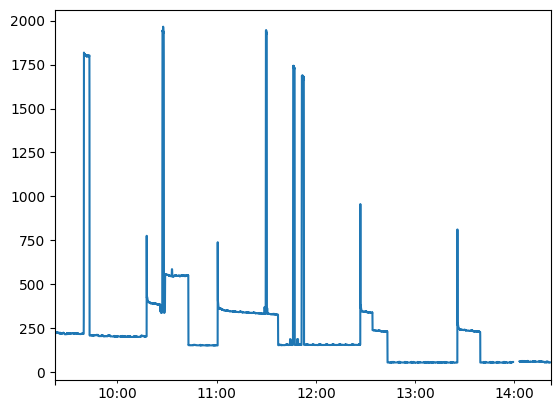

In [29]:
main_df = main_meter.power_series_all_data(**kw)
main_df.plot()

#### Fridge

<Axes: >

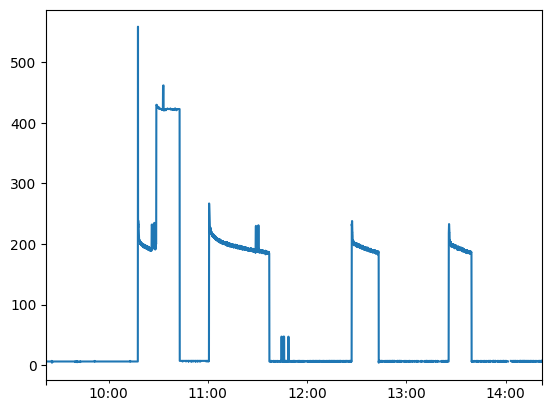

In [30]:
fridge = building_1['fridge']
fridge_df = fridge.power_series_all_data(**kw)
fridge_df.plot()

#### Microwave

<Axes: >

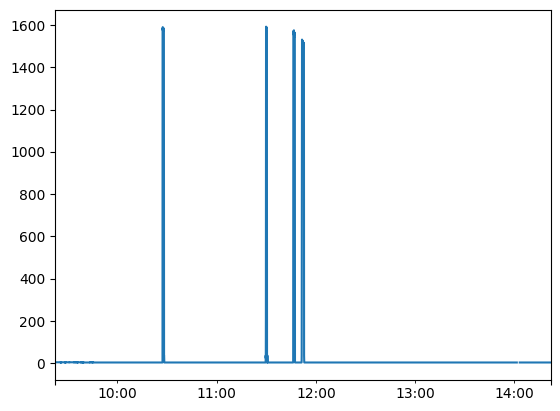

In [31]:
microwave = building_1['microwave']
microwave_df = microwave.power_series_all_data(**kw)
microwave_df.plot()

#### Unknown

<Axes: >

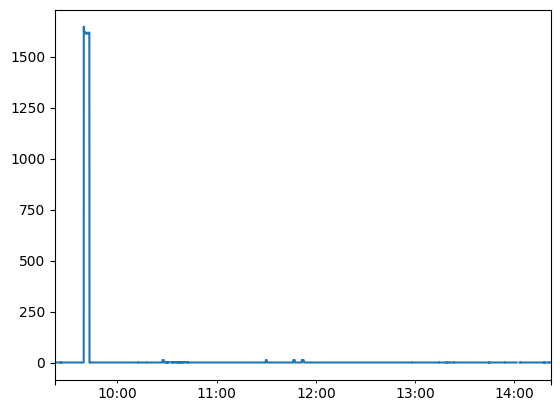

In [32]:
unknown = building_1['unknown']
unknown_df = unknown.power_series_all_data(**kw)
unknown_df.plot()

### Hart 85: Find steady states

In [43]:
# Initiate the Hart85 model
m_hart = Hart85({})

In [44]:
# Global variables
noise_level = 70
state_threshold = 15

In [45]:
main_df.name

('power', 'apparent')

In [46]:
columns = pd.MultiIndex.from_tuples([('power', 'apparent')])

In [47]:
m_hart.columns = columns
m_hart.steady_states, m_hart.transients = find_steady_states(main_df.to_frame(),  
                                                             noise_level = noise_level, 
                                                             state_threshold = state_threshold)  

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


Text(0.5, 0, 'Time')

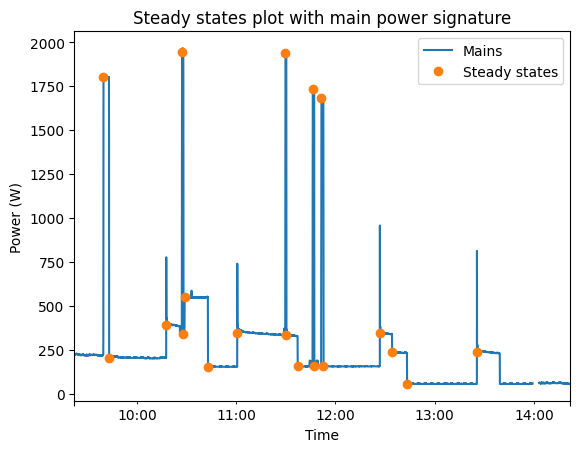

In [48]:
# Plot steady states with main
ax = main_df.plot()
m_hart.steady_states.plot(style='o', ax = ax);

plt.title("Steady states plot with main power signature")
plt.legend(["Mains", "Steady states"]);
plt.ylabel("Power (W)")
plt.xlabel("Time")

### Hart 85: Find pairs: Rising Edge and Falling Edge

In [49]:
# Parameters for pairing function
buffer_size = 20
min_tolerance = 100
percent_tolerance = 0.035
large_transition = 1000

In [50]:
m_hart.pair_df = m_hart.pair(buffer_size, min_tolerance, percent_tolerance, large_transition)

.........................Hart_85 Partial Fit End....................


In [52]:
m_hart.pair_df

,T1 Time,T1 Apparent,T2 Time,T2 Apparent
0,2011-04-18 09:39:39-04:00,1581.018725,2011-04-18 09:43:06-04:00,-1596.327068
1,2011-04-18 10:27:06-04:00,1599.624234,2011-04-18 10:28:03-04:00,-1597.762652
2,2011-04-18 11:29:42-04:00,1586.419717,2011-04-18 11:30:21-04:00,-1600.263039
3,2011-04-18 11:00:39-04:00,190.484191,2011-04-18 11:37:09-04:00,-175.345419
4,2011-04-18 11:46:12-04:00,1569.297023,2011-04-18 11:47:12-04:00,-1578.351164
5,2011-04-18 11:51:21-04:00,1526.207759,2011-04-18 11:52:45-04:00,-1519.146593
6,2011-04-18 12:26:54-04:00,188.912221,2011-04-18 12:34:15-04:00,-110.048511
7,2011-04-18 10:28:45-04:00,210.178375,2011-04-18 12:43:18-04:00,-178.663900


In [53]:
# Compute avg of paired transitions using the formula (as in pair_transitions function in pairing module)
pair_shape_df = pd.DataFrame(columns=['Height (W)','Duration (s)'])

pair_shape_df['Height (W)']= (m_hart.pair_df['T1 Apparent'].abs() + m_hart.pair_df['T2 Apparent'].abs()) / 2
pair_shape_df['Duration (s)']= pd.to_timedelta(m_hart.pair_df['T2 Time'] - m_hart.pair_df['T1 Time'],unit='s').dt.seconds

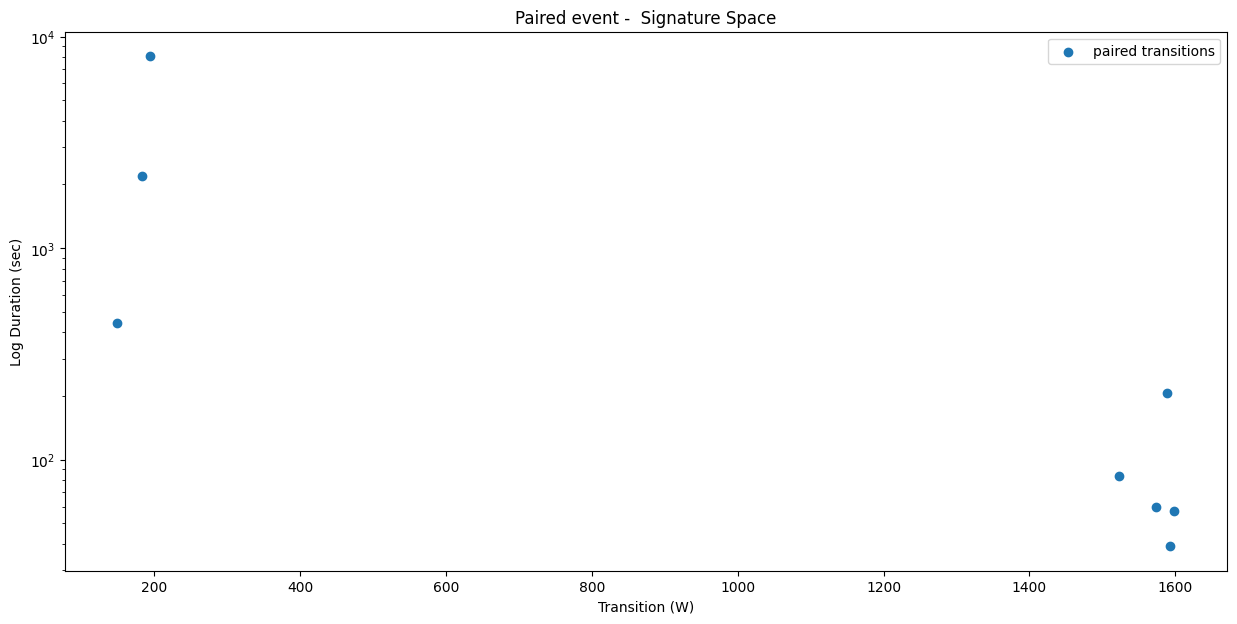

In [54]:
# Plot paired event space
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

# Time in log scale
ax.set_yscale('log')

# Plot paired transitions
ax.scatter(pair_shape_df['Height (W)'], pair_shape_df['Duration (s)'], label='paired transitions')

plt.title("Paired event -  Signature Space")
plt.legend()
plt.ylabel("Log Duration (sec)")
plt.xlabel("Transition (W)");

### Hart 85: Find Clusters

In [57]:
m_hart.centroids = hart85_means_shift_cluster(m_hart.pair_df, m_hart.columns)

In [58]:
m_hart.centroids

,power
,apparent
0,1588.632953
1,188.667971
2,1522.677176
3,149.480366


### Hart 85: Training

In [59]:
import time

In [60]:
start_time = time.time()

m_hart.partial_fit(
        [main_df.to_frame()],
        [('fridge', [fridge_df.to_frame().fillna(0)])],
        buffer_size = buffer_size,
        noise_level= noise_level,
        state_threshold = state_threshold,
        min_tolerance = min_tolerance,
        percent_tolerance = percent_tolerance,
        large_transition = large_transition)

print("\n---Runtime: %s seconds ---" % (time.time() - start_time))

...........................Hart_85 Partial Fit Running...............
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
.........................Hart_85 Partial Fit End....................
..............................Predicting Centroid Matching..........................
...................................End Centroid Matching............................

---Runtime: 0.3270394802093506 seconds ---


### Hart 85: Classification Results

In [61]:
m_hart.centroids

,"(power, apparent)"
0,1588.632953
1,188.667971
2,1522.677176
3,149.480366


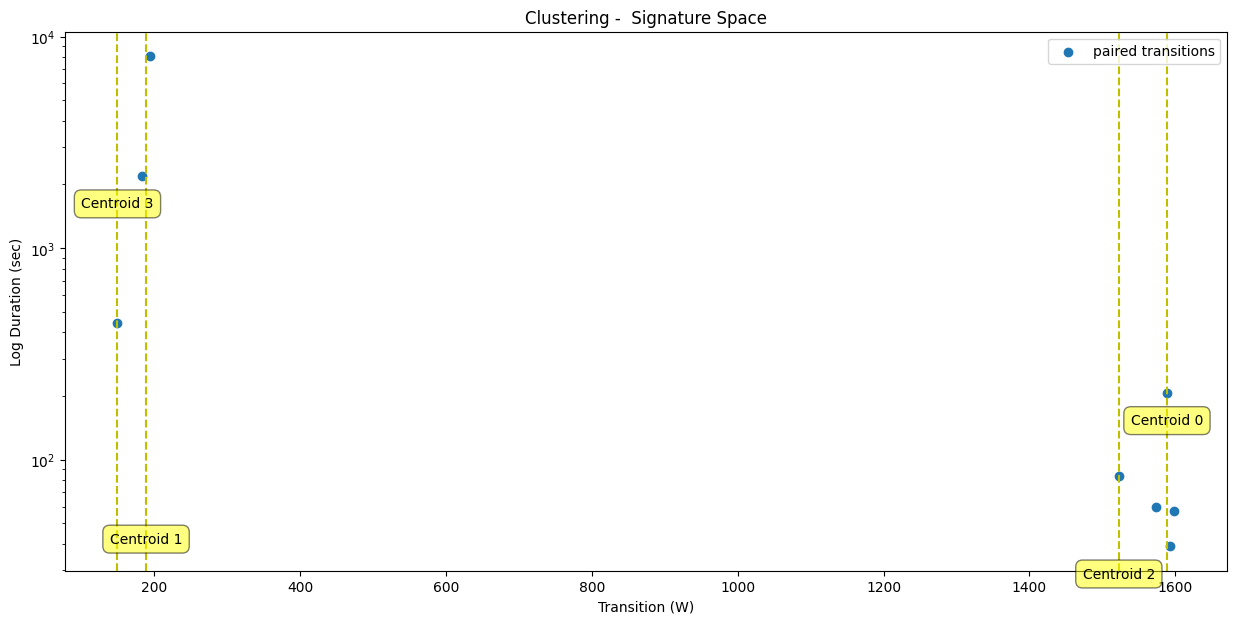

In [62]:
# Plot centroids
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

# Time in log scale
ax.set_yscale('log')

# Plot paired transitions
ax.scatter(pair_shape_df['Height (W)'], pair_shape_df['Duration (s)'], label='paired transitions')

# Lines for centroids
for i, row in m_hart.centroids.iterrows():
    ax.axvline(m_hart.centroids.iloc[i, 0],color = 'y', linestyle='--')

plt.legend(loc=1)
plt.title("Clustering -  Signature Space")
plt.ylabel("Log Duration (sec)")
plt.xlabel("Transition (W)");

# Adding annotation for centroids
labels = ['Centroid {0}'.format(i) for i in range(len(m_hart.centroids))]
for label, x, y in zip(labels, m_hart.centroids[('power','apparent')], pair_shape_df['Duration (s)']):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (0, -20),
        textcoords = 'offset points', ha = 'center', va = 'center',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5))

### Hart85: Save Model

In [72]:
m_hart.model

{'best_matches': {'fridge': 1},
 'columns': [('power', 'apparent')],
 'state_threshold': 15,
 'noise_level': 70,
 'steady_states':                            active average
 2011-04-18 09:39:39-04:00     1801.609258
 2011-04-18 09:43:06-04:00      205.282190
 2011-04-18 10:17:42-04:00      393.114310
 2011-04-18 10:27:06-04:00     1940.750381
 2011-04-18 10:28:03-04:00      341.419446
 2011-04-18 10:28:45-04:00      551.597821
 2011-04-18 10:42:54-04:00      153.821695
 2011-04-18 11:00:39-04:00      344.305886
 2011-04-18 11:29:42-04:00     1935.133034
 2011-04-18 11:30:21-04:00      334.869995
 2011-04-18 11:37:09-04:00      155.221608
 2011-04-18 11:46:12-04:00     1733.890361
 2011-04-18 11:47:12-04:00      155.539196
 2011-04-18 11:51:21-04:00     1682.704427
 2011-04-18 11:52:45-04:00      155.928419
 2011-04-18 12:26:54-04:00      344.840640
 2011-04-18 12:34:15-04:00      234.792129
 2011-04-18 12:43:18-04:00       56.128229
 2011-04-18 13:25:36-04:00      238.266715,
 'transie

In [73]:
m_hart.export_model('m_hart85.pickle')

### Hart85: Import Model

In [74]:
m_hart_load = Hart85({})

In [75]:
m_hart_load.import_model('m_hart85.pickle')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte